In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

In [2]:
# Load the dataset
file_path = "/Users/nadinejackson/Downloads/DP_LIVE_27042023205326199.csv"
df = pd.read_csv(file_path)
print(df.head())


  LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME  Value Flag Codes
0      AUS   POVERTY    0_17      RT         A  2012  0.129        NaN
1      AUS   POVERTY    0_17      RT         A  2014  0.130        NaN
2      AUS   POVERTY    0_17      RT         A  2016  0.125        NaN
3      AUS   POVERTY    0_17      RT         A  2018  0.133        NaN
4      AUS   POVERTY    0_17      RT         A  2020  0.133        NaN


In [3]:
# Preprocess the data
# Select relevant columns
df = df[['TIME', 'Value']]

# Convert the 'TIME' column to a datetime object and set it as the index
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')
df.set_index('TIME', inplace=True)

# Resample the data to annual frequency
df = df.resample('A').mean()


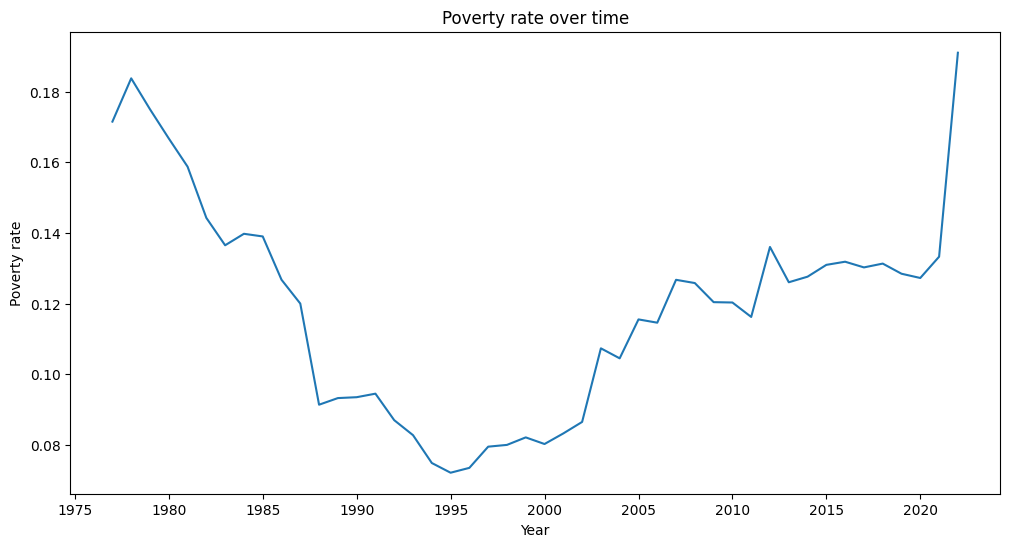

In [5]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Poverty rate')
plt.title('Poverty rate over time')
plt.show()

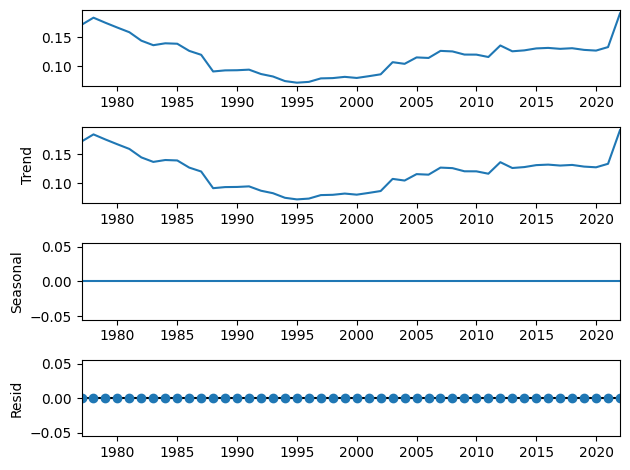

In [6]:
# Decompose time series
# Perform seasonal decomposition using the statsmodels library
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

# Plot the decomposition components
fig = decomposition.plot()
plt.show()


In [7]:
# Find the best ARIMA parameters
model = auto_arima(df, seasonal=False, trace=True, suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-261.965, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-60.588, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-112.975, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-264.909, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-153.728, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-265.181, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-267.348, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-221.779, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-268.854, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-187.047, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-267.221, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-264.90

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 137.427
Date:                Thu, 27 Apr 2023   AIC                           -268.854
Time:                        13:54:45   BIC                           -263.368
Sample:                    12-31-1976   HQIC                          -266.799
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0066      0.012      0.557      0.578      -0.017       0.030
ar.L1          0.9559      0.094     10.193      0.000       0.772       1.140
sigma2         0.0001   1.49e-05      9.472      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               257.53
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             2.35
Prob(H) (two-sided):                  0.14   Kurtosis:                        13.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# Train and fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Retrieve the best parameters for the ARIMA model
best_p = model.get_params()['order'][0]
best_d = model.get_params()['order'][1]
best_q = model.get_params()['order'][2]

# Fit the ARIMA model
arima_model = ARIMA(df, order=(best_p, best_d, best_q))
arima_model = arima_model.fit()


In [9]:
# Forecast the next 5 years
forecast_steps = 5
forecast = model.predict(n_periods=forecast_steps)

# Create a new DataFrame for the forecasted values
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='A')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Predicted Poverty Rate'])


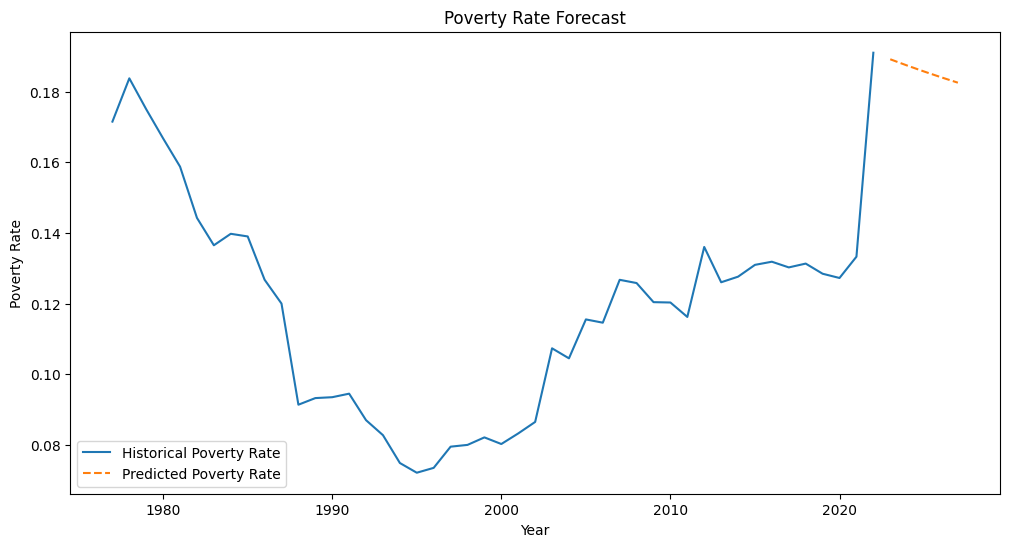

In [10]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Poverty Rate')
plt.plot(forecast_df, label='Predicted Poverty Rate', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Forecast')
plt.legend()
plt.show()

In [11]:
# Unit test
import unittest

class TestARIMAForecast(unittest.TestCase):
    def test_forecast_length(self):
        self.assertEqual(len(forecast_df), forecast_steps, "The number of forecasted values should be equal to the forecast_steps.")

# Run the test
unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK
